# Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
pd.options.display.max_columns = 999
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime

In [2]:
feature_dict = pd.read_csv('feature_dictionary.csv')

In [3]:
feature_dict.columns

Index(['Simplified ', 'Original Defination'], dtype='object')

In [4]:
feature_dict.head()

,Simplified,Original Defination
0,Y,PrCalifornia...all.sectors.cents.per.kilowatthour
1,f1,GenCalifornia...all.fuels..utility.scale..thou...
2,f2,GenCalifornia...coal.thousand.megawatthours
3,f3,GenCalifornia...petroleum.liquids.thousand.meg...
4,f4,GenCalifornia...petroleum.coke.thousand.megawa...


In [5]:
df = pd.read_csv('final_simplified columns.csv')

In [6]:
df.head()

,Month,Price,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71
0,2001-01,8.71,16618.887,199.857,263.922,195.781,10192.494,97.569,2379.998,1590.096,1717.39841,-36.255,18.02659,1085.733,-0.045,1085.778,1638.071284,52.22,60.48,51.45,21.638,228.434,444.968,194.798,14.612,3.102,4.022,175.982,30.814,23.739,230.534,447.068,8.91,10.12,98.0,9.50,72.9,8.84,23.5,9.55,83.0,318.736,0.629,13.128,332.493,3.415,1.549,1.865,9.223,310.846,14.289,325.135,7.73,7.25,4.75,7.2,6.75,976.677,500.267,95.602,110.934,575.605,686.540,782.141,76.386,1.235,77.621,340.292,2676.998,85.43,94388.265,21744.31668,154.43
1,2001-02,9.63,14380.392,184.141,175.649,179.294,8870.575,101.840,2229.872,1290.013,1504.66303,-172.957,17.30197,951.164,-0.045,951.209,1637.154237,50.04,57.29,71.37,19.670,202.849,404.066,180.547,12.812,3.401,4.456,155.969,27.210,20.084,203.263,404.480,7.08,10.26,98.0,9.80,71.8,7.21,23.2,7.18,83.0,270.971,0.548,11.421,282.940,3.316,2.852,0.464,-1.351,272.324,12.432,284.756,8.04,7.51,4.81,7.2,6.87,780.482,422.407,86.821,98.421,541.605,640.026,726.847,65.770,1.115,66.885,312.843,2309.464,82.33,82259.189,18305.55916,138.33
2,2001-03,9.89,15848.633,102.496,119.553,163.725,9474.176,103.127,2468.625,1764.772,1788.32478,-152.658,16.49222,1052.634,-0.040,1052.674,1636.237190,56.12,67.10,77.43,21.192,219.649,455.777,211.591,14.206,4.833,5.498,168.140,30.317,21.550,220.006,456.134,6.10,9.85,98.0,9.14,69.2,6.30,22.0,5.91,83.0,287.700,0.553,12.454,300.707,3.527,1.793,1.734,19.616,269.315,13.510,282.825,8.32,7.70,4.87,7.2,7.01,681.884,375.688,96.438,107.759,557.159,664.918,761.357,63.626,1.235,64.861,362.843,2246.633,43.27,87836.609,21351.40877,108.27
3,2001-04,9.88,15841.018,205.590,90.016,162.202,9208.768,92.264,2318.671,2096.459,1797.49360,-143.867,13.42140,966.038,-0.038,966.076,1635.320144,54.87,65.57,72.80,19.537,213.628,425.362,186.128,13.162,5.368,7.075,163.973,30.118,18.710,212.800,424.534,6.30,10.16,98.0,9.01,66.5,6.08,21.0,5.82,83.0,265.855,0.550,11.674,278.079,3.793,1.415,2.378,13.434,254.326,12.697,267.023,8.46,7.73,4.87,7.2,7.02,400.728,255.361,92.602,100.575,521.479,622.054,714.656,50.736,1.195,51.931,384.494,1807.170,90.97,84775.232,18855.59986,155.97
4,2001-05,9.82,16874.504,200.475,103.191,168.005,9698.874,108.042,1667.926,3045.222,1831.96794,34.607,16.19406,960.339,-0.031,960.370,1634.403097,66.45,81.29,72.58,20.222,211.506,435.512,198.142,12.980,6.322,6.562,161.457,29.828,19.576,210.861,434.866,5.77,11.14,98.0,9.19,61.0,5.46,19.5,5.29,83.0,288.166,0.575,11.751,300.492,4.416,1.549,2.867,26.113,264.442,12.803,277.245,8.83,7.77,5.00,7.2,7.17,209.327,164.146,94.981,103.458,473.074,576.532,671.513,42.238,1.235,43.473,433.923,1522.382,86.68,87603.937,19862.25747,149.68


In [7]:
df.shape

(199, 73)

In [8]:
# Seperate training and testing data
df_train = df[df['Month']<'2015-01-01']
df_test = df[(df['Month']>'2014-12-01') & (df['Month']<'2017-01-01')]

In [9]:
# Make datetime as index
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('final_simplified columns.csv', parse_dates=['Month'],index_col='Month',date_parser=dateparse)

In [10]:
df.head()

,Price,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,8.71,16618.887,199.857,263.922,195.781,10192.494,97.569,2379.998,1590.096,1717.39841,-36.255,18.02659,1085.733,-0.045,1085.778,1638.071284,52.22,60.48,51.45,21.638,228.434,444.968,194.798,14.612,3.102,4.022,175.982,30.814,23.739,230.534,447.068,8.91,10.12,98.0,9.50,72.9,8.84,23.5,9.55,83.0,318.736,0.629,13.128,332.493,3.415,1.549,1.865,9.223,310.846,14.289,325.135,7.73,7.25,4.75,7.2,6.75,976.677,500.267,95.602,110.934,575.605,686.540,782.141,76.386,1.235,77.621,340.292,2676.998,85.43,94388.265,21744.31668,154.43
2001-02-01,9.63,14380.392,184.141,175.649,179.294,8870.575,101.840,2229.872,1290.013,1504.66303,-172.957,17.30197,951.164,-0.045,951.209,1637.154237,50.04,57.29,71.37,19.670,202.849,404.066,180.547,12.812,3.401,4.456,155.969,27.210,20.084,203.263,404.480,7.08,10.26,98.0,9.80,71.8,7.21,23.2,7.18,83.0,270.971,0.548,11.421,282.940,3.316,2.852,0.464,-1.351,272.324,12.432,284.756,8.04,7.51,4.81,7.2,6.87,780.482,422.407,86.821,98.421,541.605,640.026,726.847,65.770,1.115,66.885,312.843,2309.464,82.33,82259.189,18305.55916,138.33
2001-03-01,9.89,15848.633,102.496,119.553,163.725,9474.176,103.127,2468.625,1764.772,1788.32478,-152.658,16.49222,1052.634,-0.040,1052.674,1636.237190,56.12,67.10,77.43,21.192,219.649,455.777,211.591,14.206,4.833,5.498,168.140,30.317,21.550,220.006,456.134,6.10,9.85,98.0,9.14,69.2,6.30,22.0,5.91,83.0,287.700,0.553,12.454,300.707,3.527,1.793,1.734,19.616,269.315,13.510,282.825,8.32,7.70,4.87,7.2,7.01,681.884,375.688,96.438,107.759,557.159,664.918,761.357,63.626,1.235,64.861,362.843,2246.633,43.27,87836.609,21351.40877,108.27
2001-04-01,9.88,15841.018,205.590,90.016,162.202,9208.768,92.264,2318.671,2096.459,1797.49360,-143.867,13.42140,966.038,-0.038,966.076,1635.320144,54.87,65.57,72.80,19.537,213.628,425.362,186.128,13.162,5.368,7.075,163.973,30.118,18.710,212.800,424.534,6.30,10.16,98.0,9.01,66.5,6.08,21.0,5.82,83.0,265.855,0.550,11.674,278.079,3.793,1.415,2.378,13.434,254.326,12.697,267.023,8.46,7.73,4.87,7.2,7.02,400.728,255.361,92.602,100.575,521.479,622.054,714.656,50.736,1.195,51.931,384.494,1807.170,90.97,84775.232,18855.59986,155.97
2001-05-01,9.82,16874.504,200.475,103.191,168.005,9698.874,108.042,1667.926,3045.222,1831.96794,34.607,16.19406,960.339,-0.031,960.370,1634.403097,66.45,81.29,72.58,20.222,211.506,435.512,198.142,12.980,6.322,6.562,161.457,29.828,19.576,210.861,434.866,5.77,11.14,98.0,9.19,61.0,5.46,19.5,5.29,83.0,288.166,0.575,11.751,300.492,4.416,1.549,2.867,26.113,264.442,12.803,277.245,8.83,7.77,5.00,7.2,7.17,209.327,164.146,94.981,103.458,473.074,576.532,671.513,42.238,1.235,43.473,433.923,1522.382,86.68,87603.937,19862.25747,149.68


# Feature Selection

In [11]:
## Applied VIF on R

In [12]:
# Selected Features = f3+f5+f6+f13+f15+f16+f18+f22+f26+f37+f38+f48+f49+f60+f70 
# 15 in total

In [13]:
df1 = df[['f3','f5','f6','f13','f15','f16','f18','f22','f26','f37','f38','f48','f49','f60','f70']]

In [14]:
df1.head()

,f3,f5,f6,f13,f15,f16,f18,f22,f26,f37,f38,f48,f49,f60,f70
Month,,,,,,,,,,,,,,,
2001-01-01,263.922,10192.494,97.569,-0.045,1638.071284,52.22,51.45,194.798,175.982,23.5,9.55,310.846,14.289,575.605,21744.31668
2001-02-01,175.649,8870.575,101.840,-0.045,1637.154237,50.04,71.37,180.547,155.969,23.2,7.18,272.324,12.432,541.605,18305.55916
2001-03-01,119.553,9474.176,103.127,-0.040,1636.237190,56.12,77.43,211.591,168.140,22.0,5.91,269.315,13.510,557.159,21351.40877
2001-04-01,90.016,9208.768,92.264,-0.038,1635.320144,54.87,72.80,186.128,163.973,21.0,5.82,254.326,12.697,521.479,18855.59986
2001-05-01,103.191,9698.874,108.042,-0.031,1634.403097,66.45,72.58,198.142,161.457,19.5,5.29,264.442,12.803,473.074,19862.25747


In [15]:
feature_dict_selec = pd.read_csv('feature_dictionary_selected.csv')

In [16]:
feature_dict_selec

,Simplified,Original Defination
0,Y,PrCalifornia...all.sectors.cents.per.kilowatthour
1,f3,GenCalifornia...petroleum.liquids.thousand.meg...
2,f5,GenCalifornia...natural.gas.thousand.megawatth...
3,f6,GenCalifornia...other.gases.thousand.megawatth...
4,f13,GenCalifornia..Geothermal.electric.utility
5,f15,GDP
6,f16,Av.Temp
7,f18,Av.Rel.Humid
8,f22,Hydro.Consumption.TrillBtu.
9,f26,WoodConsump..TrillBTU.


# Check Stationarity

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def test_stationarity(timeseries):
#Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
#Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dfoutput[0] < dfoutput[4]:
        print("TEST RESULT = stationary")
    else:
        print("TEST RESULT = non-stationary ")

Results of Dickey-Fuller Test:
Test Statistic                  -3.396547
p-value                          0.011077
#Lags Used                       9.000000
Number of Observations Used    189.000000
Critical Value (1%)             -3.465431
Critical Value (5%)             -2.876957
Critical Value (10%)            -2.574988
dtype: float64
TEST RESULT = non-stationary 


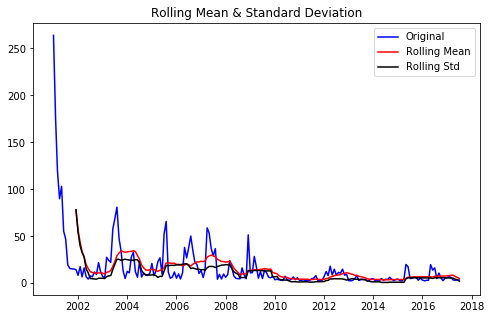

In [19]:
test_stationarity(df1['f3'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.138755
p-value                          0.229219
#Lags Used                      13.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64
TEST RESULT = non-stationary 


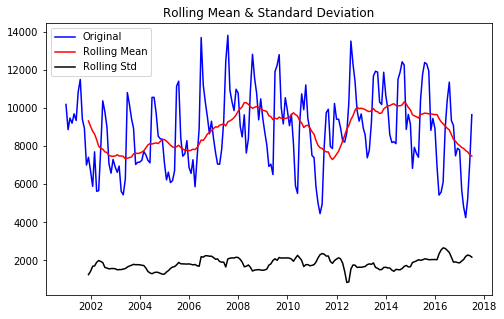

In [20]:
test_stationarity(df1['f5'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.640681
p-value                          0.084877
#Lags Used                       5.000000
Number of Observations Used    193.000000
Critical Value (1%)             -3.464694
Critical Value (5%)             -2.876635
Critical Value (10%)            -2.574816
dtype: float64
TEST RESULT = non-stationary 


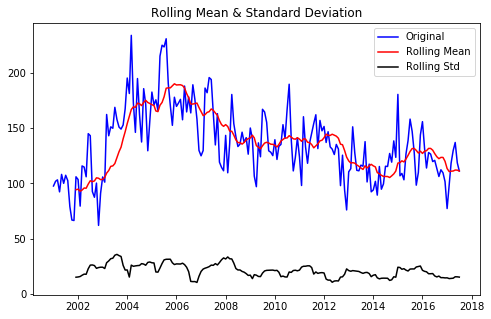

In [21]:
test_stationarity(df1['f6'])

Results of Dickey-Fuller Test:
Test Statistic                  -5.423215
p-value                          0.000003
#Lags Used                       7.000000
Number of Observations Used    191.000000
Critical Value (1%)             -3.465059
Critical Value (5%)             -2.876794
Critical Value (10%)            -2.574901
dtype: float64
TEST RESULT = stationary


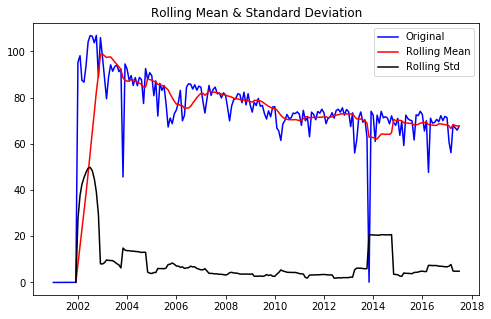

In [22]:
test_stationarity(df1['f13'])

Results of Dickey-Fuller Test:
Test Statistic                   0.295308
p-value                          0.977128
#Lags Used                       2.000000
Number of Observations Used    196.000000
Critical Value (1%)             -3.464161
Critical Value (5%)             -2.876402
Critical Value (10%)            -2.574692
dtype: float64
TEST RESULT = non-stationary 


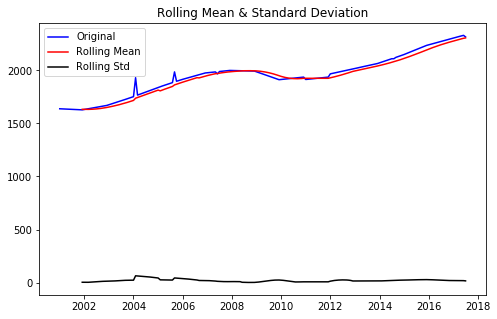

In [23]:
test_stationarity(df1['f15'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.132827
p-value                          0.231521
#Lags Used                      12.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64
TEST RESULT = non-stationary 


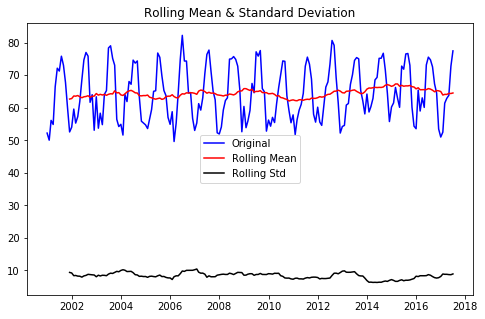

In [24]:
test_stationarity(df1['f16'])

Results of Dickey-Fuller Test:
Test Statistic                -7.311794e+00
p-value                        1.258740e-10
#Lags Used                     1.000000e+00
Number of Observations Used    1.970000e+02
Critical Value (1%)           -3.463987e+00
Critical Value (5%)           -2.876326e+00
Critical Value (10%)          -2.574652e+00
dtype: float64
TEST RESULT = stationary


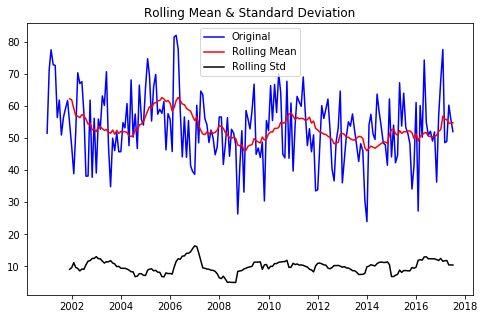

In [25]:
test_stationarity(df1['f18'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.936722
p-value                          0.041241
#Lags Used                      12.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64
TEST RESULT = non-stationary 


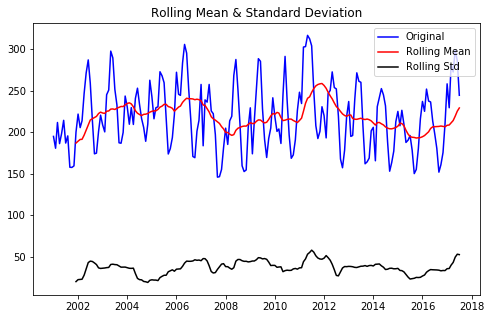

In [26]:
test_stationarity(df1['f22'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.963137
p-value                          0.038483
#Lags Used                      13.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64
TEST RESULT = non-stationary 


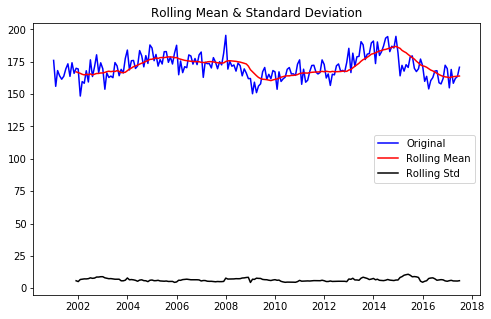

In [27]:
test_stationarity(df1['f26'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.297389
p-value                          0.925873
#Lags Used                      15.000000
Number of Observations Used    183.000000
Critical Value (1%)             -3.466598
Critical Value (5%)             -2.877467
Critical Value (10%)            -2.575260
dtype: float64
TEST RESULT = non-stationary 


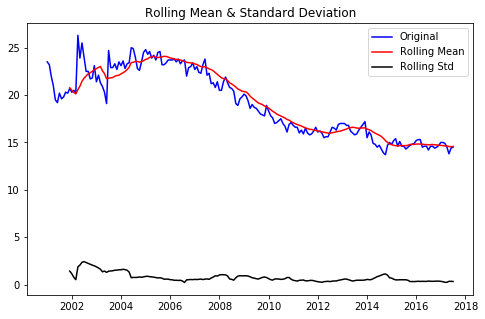

In [28]:
test_stationarity(df1['f37'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.869860
p-value                          0.048967
#Lags Used                       1.000000
Number of Observations Used    197.000000
Critical Value (1%)             -3.463987
Critical Value (5%)             -2.876326
Critical Value (10%)            -2.574652
dtype: float64
TEST RESULT = non-stationary 


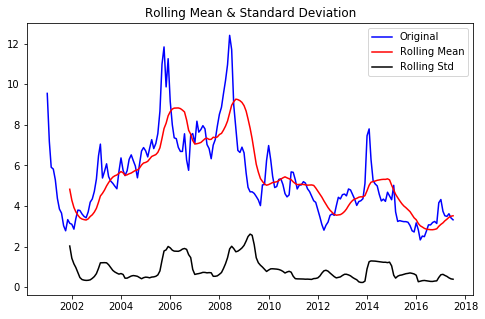

In [29]:
test_stationarity(df1['f38'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.911164
p-value                          0.044065
#Lags Used                      12.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64
TEST RESULT = non-stationary 


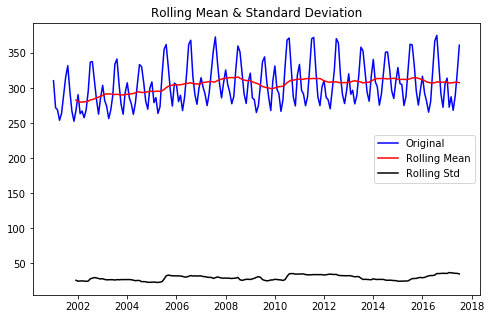

In [30]:
test_stationarity(df1['f48'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.549045
p-value                          0.509125
#Lags Used                      12.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64
TEST RESULT = non-stationary 


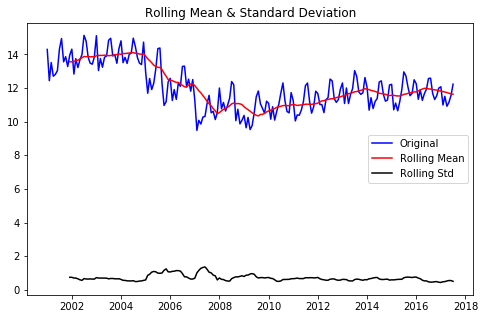

In [31]:
test_stationarity(df1['f49'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.556118
p-value                          0.505591
#Lags Used                      12.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64
TEST RESULT = non-stationary 


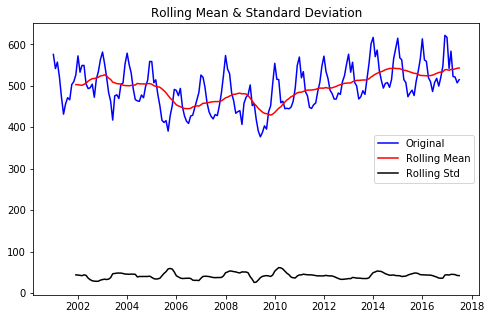

In [32]:
test_stationarity(df1['f60'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.058216
p-value                          0.261644
#Lags Used                      14.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64
TEST RESULT = non-stationary 


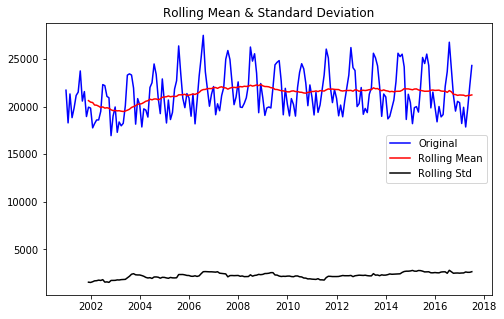

In [33]:
test_stationarity(df1['f70'])

# Price Plot

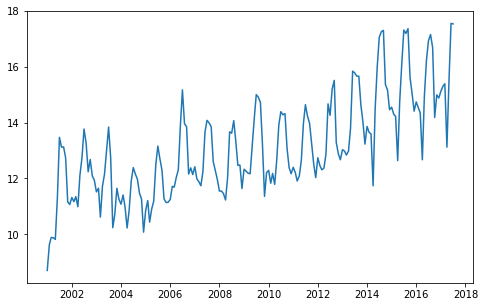

In [34]:
plt.plot(df['Price'])

# Remove Trend and Seasonality 1 - Differencing

df1_diffrence1 = df1

for f in df1_diffrence1.columns.values:
    
    df1_diffrence1[f + '_first_diff'] = (df1_diffrence1[f] - df1_diffrence1[f].shift(1))
    df1_diffrence1 = df1_diffrence1.drop([f], axis = 1)
    print(f + '_first_diff')
    print('')
    df1_diffrence1.dropna(inplace=True)
    test_stationarity(df1_diffrence1[f + '_first_diff'])
    print('')
    print('###########################################################################################')
    print('')  

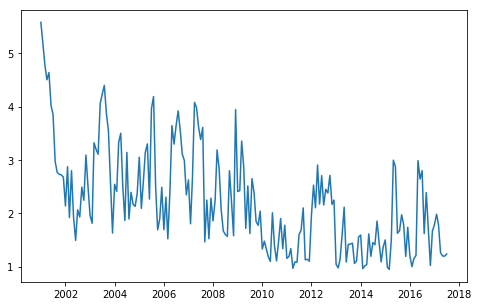

In [35]:
f3 = df1['f3']
f3_log = np.log(f3)
plt.plot(f3_log)

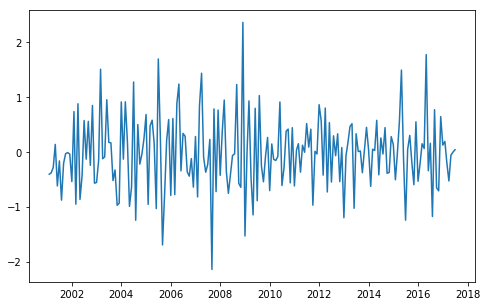

In [36]:
f3_log_diff = f3_log - f3_log.shift()
plt.plot(f3_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                -8.110784e+00
p-value                        1.227519e-12
#Lags Used                     7.000000e+00
Number of Observations Used    1.900000e+02
Critical Value (1%)           -3.465244e+00
Critical Value (5%)           -2.876875e+00
Critical Value (10%)          -2.574945e+00
dtype: float64
TEST RESULT = stationary


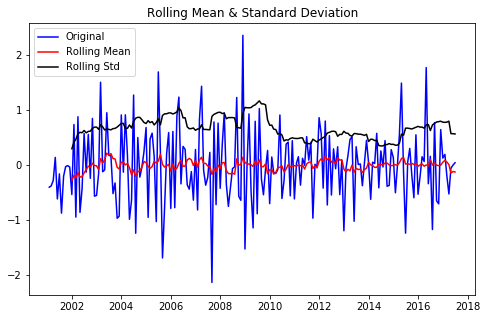

In [37]:
f3_log_diff.dropna(inplace=True)
test_stationarity(f3_log_diff)

# Remove Trend and Seasonality 2

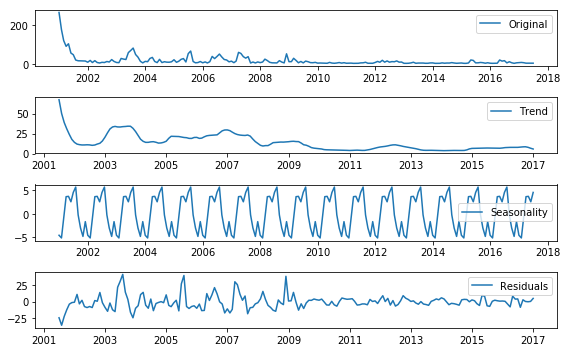

In [38]:
# 2.Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1['f3'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df1['f3'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Results of Dickey-Fuller Test:
Test Statistic                -1.049892e+01
p-value                        1.096934e-18
#Lags Used                     4.000000e+00
Number of Observations Used    1.820000e+02
Critical Value (1%)           -3.466800e+00
Critical Value (5%)           -2.877555e+00
Critical Value (10%)          -2.575308e+00
dtype: float64
TEST RESULT = stationary


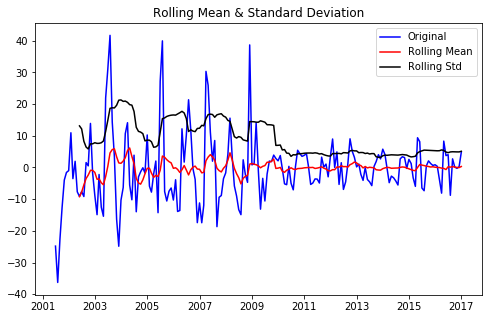

In [39]:
f3_decompose = residual
f3_decompose.dropna(inplace=True)
test_stationarity(f3_decompose)

# Forecasting a Time Series

In [40]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [79]:
p = d = q = range(0, 5)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(f3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1935.0981001010127
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1923.5322441138514
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:1919.0482728699303
ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:1916.491578874994
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1790.1649611689836
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1789.831135215657
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC:1791.786033970844
ARIMA(0, 0, 0)x(0, 1, 4, 12)12 - AIC:6983.270183626334
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1733.8783022618327
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:1719.6671834855947
ARIMA(0, 0, 0)x(0, 2, 3, 12)12 - AIC:1719.64192164476
ARIMA(0, 0, 0)x(0, 2, 4, 12)12 - AIC:7010.968806884337
ARIMA(0, 0, 0)x(0, 3, 1, 12)12 - AIC:1715.3106860103633
ARIMA(0, 0, 0)x(0, 3, 2, 12)12 - AIC:1698.2451900847077
ARIMA(0, 0, 0)x(0, 3, 3, 12)12 - AIC:1701.4781238381834
ARIMA(0, 0, 0)x(0, 3, 4, 12)12 - AIC:6491.561286499151
ARIMA(0, 0, 0)x(0, 4, 1, 12)12 - AIC:1632.0351570296068
ARIMA(0, 0, 0)x(0, 4, 2, 12)12 - AIC:1621.5644743100047


ARIMA(0, 0, 1)x(1, 1, 4, 12)12 - AIC:7611.131210837417
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:1657.5090202998576
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:1629.8693287969718
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:1627.761386483654
ARIMA(0, 0, 1)x(1, 2, 3, 12)12 - AIC:1629.4340007824921
ARIMA(0, 0, 1)x(1, 2, 4, 12)12 - AIC:7401.325349536486
ARIMA(0, 0, 1)x(1, 3, 0, 12)12 - AIC:1599.761327992836
ARIMA(0, 0, 1)x(1, 3, 1, 12)12 - AIC:1593.7081852216675
ARIMA(0, 0, 1)x(1, 3, 2, 12)12 - AIC:1590.9421155162588
ARIMA(0, 0, 1)x(1, 3, 3, 12)12 - AIC:1591.4382374508782
ARIMA(0, 0, 1)x(1, 3, 4, 12)12 - AIC:6088.377153963005
ARIMA(0, 0, 1)x(1, 4, 0, 12)12 - AIC:1551.2564169134791
ARIMA(0, 0, 1)x(1, 4, 1, 12)12 - AIC:1547.7723464476999
ARIMA(0, 0, 1)x(1, 4, 2, 12)12 - AIC:1568.698793459388
ARIMA(0, 0, 1)x(1, 4, 3, 12)12 - AIC:1583.7622930995808
ARIMA(0, 0, 1)x(1, 4, 4, 12)12 - AIC:11633.693077031781
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:1789.378760334068
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:1785.6090487778483

ARIMA(0, 0, 2)x(2, 3, 2, 12)12 - AIC:1565.0697728941536
ARIMA(0, 0, 2)x(2, 3, 3, 12)12 - AIC:1571.0116215821054
ARIMA(0, 0, 2)x(2, 3, 4, 12)12 - AIC:6350.320868404572
ARIMA(0, 0, 2)x(2, 4, 0, 12)12 - AIC:1535.4901928441268
ARIMA(0, 0, 2)x(2, 4, 1, 12)12 - AIC:1540.257522723137
ARIMA(0, 0, 2)x(2, 4, 2, 12)12 - AIC:1614.912844064139
ARIMA(0, 0, 2)x(2, 4, 3, 12)12 - AIC:2519.506081266417
ARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:1727.4098542644488
ARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:1724.9622965753197
ARIMA(0, 0, 2)x(3, 0, 2, 12)12 - AIC:1726.6965819133802
ARIMA(0, 0, 2)x(3, 0, 3, 12)12 - AIC:1729.3978706867051
ARIMA(0, 0, 2)x(3, 0, 4, 12)12 - AIC:1729.6651463635976
ARIMA(0, 0, 2)x(3, 1, 0, 12)12 - AIC:1662.882094023022
ARIMA(0, 0, 2)x(3, 1, 1, 12)12 - AIC:1637.4714452347603
ARIMA(0, 0, 2)x(3, 1, 2, 12)12 - AIC:1638.8400490869703
ARIMA(0, 0, 2)x(3, 1, 3, 12)12 - AIC:1640.6999317763443
ARIMA(0, 0, 2)x(3, 2, 0, 12)12 - AIC:1604.5203759726069
ARIMA(0, 0, 2)x(3, 2, 1, 12)12 - AIC:1590.47336089418

In [ ]:
# ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:1507.35304368763
# ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:1501.9542184514194
# ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:1501.8329105552943
# ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:1501.1783935062565

In [ ]:
# Seperate training and testing data
f3_train = f3[f3['Month']<'2016-01-01']
f3_test = f3[(f3['Month']>'2016-12-01') & (f3['Month']<'2017-01-01')]

In [43]:
mod = sm.tsa.statespace.SARIMAX(f3,
                                order=(1, 2, 2),
                                seasonal_order=(0, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6272      0.029     21.754      0.000       0.571       0.684
ma.L1         -2.0183      0.060    -33.567      0.000      -2.136      -1.900
ma.L2          1.0229      0.061     16.682      0.000       0.903       1.143
ma.S.L12      -1.6419      7.377     -0.223      0.824     -16.101      12.817
ma.S.L24       0.6435      4.721      0.136      0.892      -8.609       9.896
sigma2       108.5474    800.735      0.136      0.892   -1460.865    1677.960


In [ ]:
# results.plot_diagnostics(figsize=(15, 12))

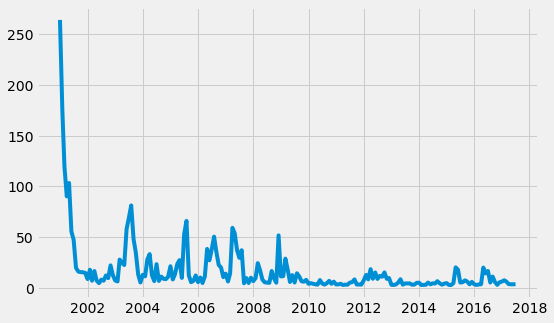

In [44]:
plt.plot(f3)

### Static Forecast

In [ ]:
#f3 = df1['f15']

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

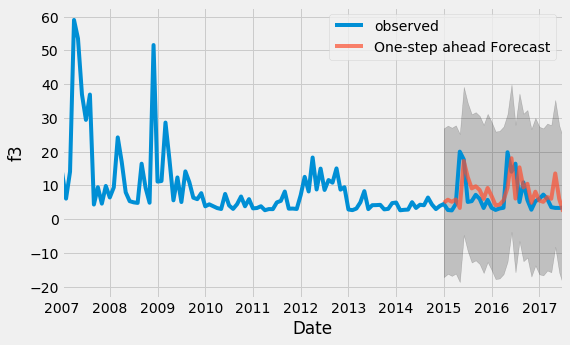

In [46]:
ax = f3['2007':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('f3')
plt.legend()

plt.show()

In [47]:
f3_forecasted = pred.predicted_mean
f3_truth = f3['2015-01-01':]

# Compute the mean square error
mse = ((f3_forecasted - f3_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 29.68


### Dynamic Forecast

In [75]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2006-01-01'),end=pd.to_datetime('2009-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

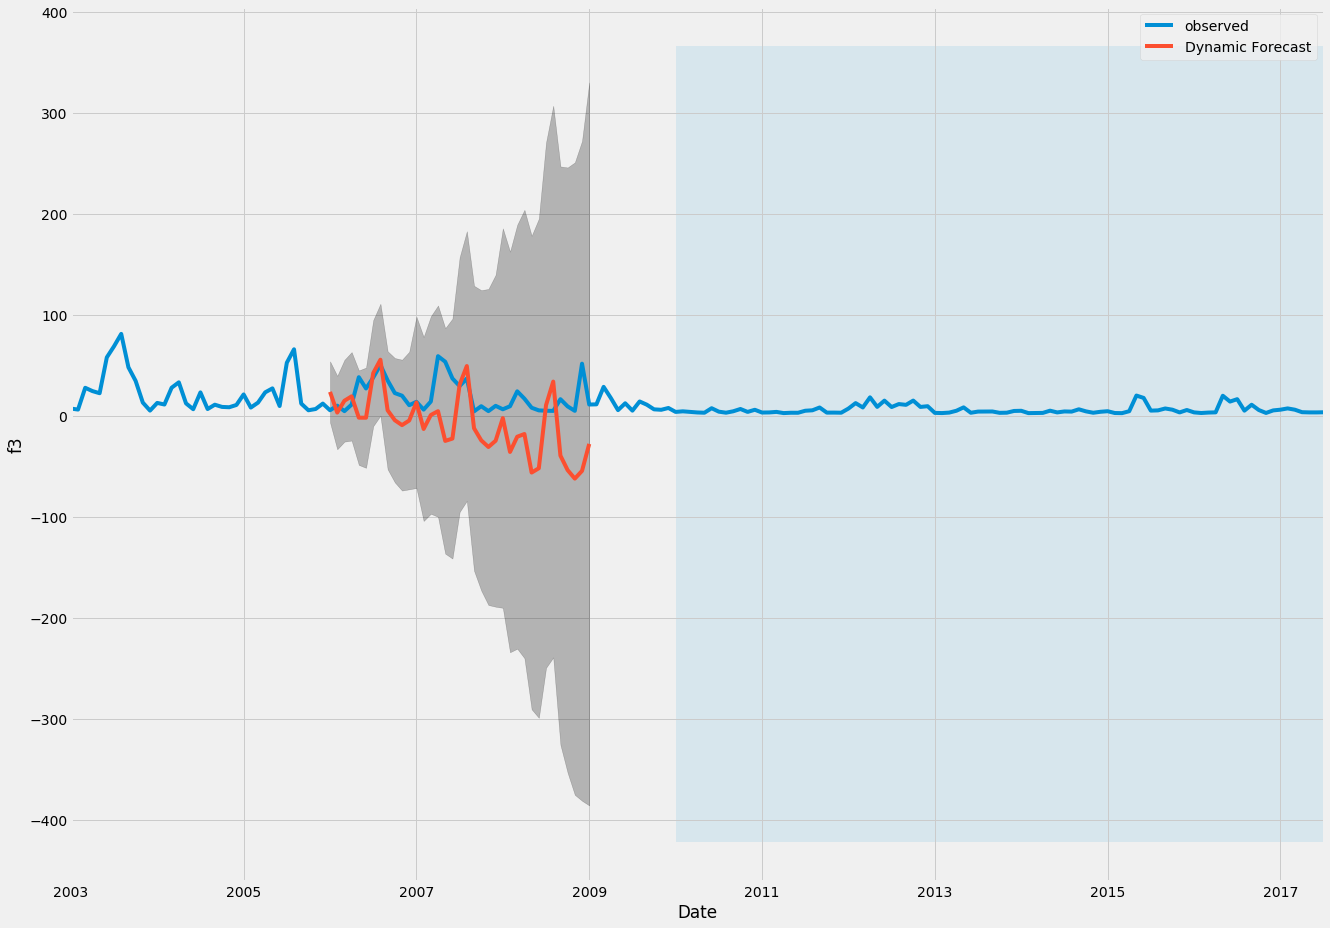

In [78]:
ax = f3['2003':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2010-01-01'), f3.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('f3')

plt.legend()
plt.show()

In [68]:
# Extract the predicted and true values of our time series
f3_forecasted = pred_dynamic.predicted_mean
f3_truth = f3['2015-01-01':]

# Compute the mean square error
mse = ((f3_forecasted - f3_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 132.68


# Producing and Visualizing Forecasts

In [71]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=90)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

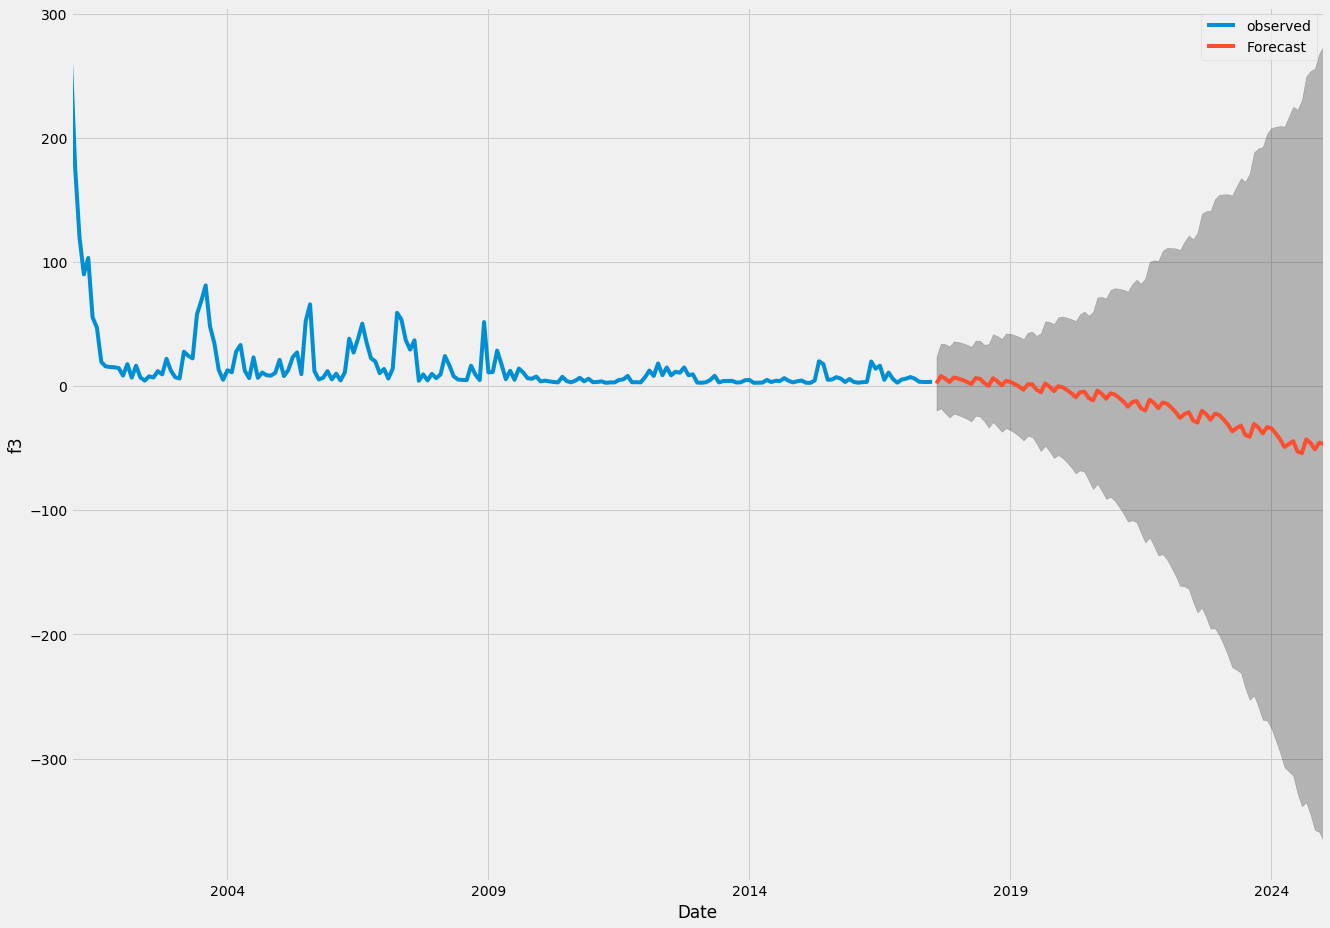

In [72]:
ax = f3.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('f3')

plt.legend()
plt.show()

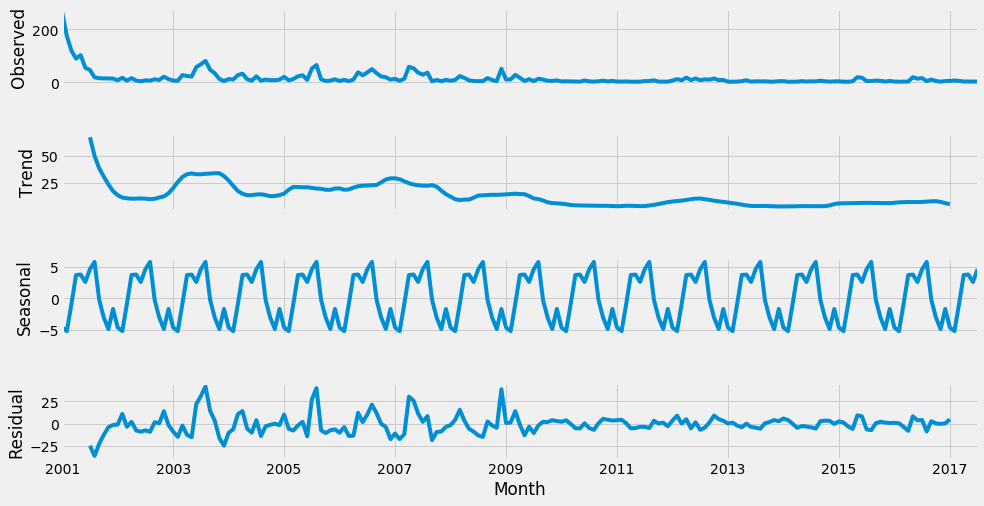

In [53]:
decomposition = seasonal_decompose(f3, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [54]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.residual 

AttributeError: 'DecomposeResult' object has no attribute 'residual'

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf_f3 = acf(f3_log_diff, nlags=2)
lag_pacf_f3 = pacf(f3_log_diff, nlags=2, method='ols')

In [ ]:
#Plot ACF: q=0.7
plt.subplot(111) 
plt.plot(lag_acf_f3)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(f3_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(f3_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [ ]:
#Plot PACF: p = 2
plt.subplot(111)
plt.plot(lag_pacf_f3)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(f3_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(f3_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# AR Model

In [ ]:
# (p,d,q) p =0.7

In [ ]:
model = ARIMA(f3_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(f3_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-f3_log_diff)**2))

# MA Model

In [ ]:
model = ARIMA(f3_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(f3_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - f3_log_diff)**2))

# ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(f3_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(f3_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - f3_log_diff)**2))

In [ ]:
# Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(f3_log.ix[0], index=f3_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(f3)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_f3)**2)/len(ts)))

In [ ]:
plt.plot(f3)

In [ ]:
plt.plot(predictions_ARIMA)